In [2]:
# for downloading kaggle dataset

# %%bash
# pip install kaggle
# mkdir tensorflow-python/Projects/Road_sign/.kaggle
# cp kaggle.json tensorflow-python/Projects/Road_sign/.kaggle/kaggle.json
# chmod 600

# Convert Pascal VOC to YOLO Format

In [3]:
from preprocessing import convert_voc_to_yolo

In [4]:
convert_voc_to_yolo()

# Get YOLOv5

In [ ]:
%%bash
git clone https://github.com/ultralytics/yolov5
cd yolov5
pip install -r requirements.txt

In [6]:
%%bash
cp ./yolov5/data/VOC.yaml ./yolov5/VOC.yaml

# Training model

In [17]:
%%bash
cd yolov5 
python train.py --img 320 --batch 16 --epochs 5 --data customVOC.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=customVOC.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest


github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5


YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.9.13 torch-1.13.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
ClearML: run 'pip install clearml' to automatically track, visualize and remotely train YOLOv5 🚀 in ClearML
Comet: run 'pip install comet_ml' to automatically track and visualize YOLOv5 🚀 runs in Comet
TensorBoard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=4

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1     

In [18]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os 

In [31]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp9/weights/best.pt', force_reload=True)

/Users/shaikmohammadasrarahammad/Downloads/Data_Science/tensorflow-python/tf-nogpu/lib/python3.9/site-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/shaikmohammadasrarahammad/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-1-5 Python-3.9.13 torch-1.13.1 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding Auto

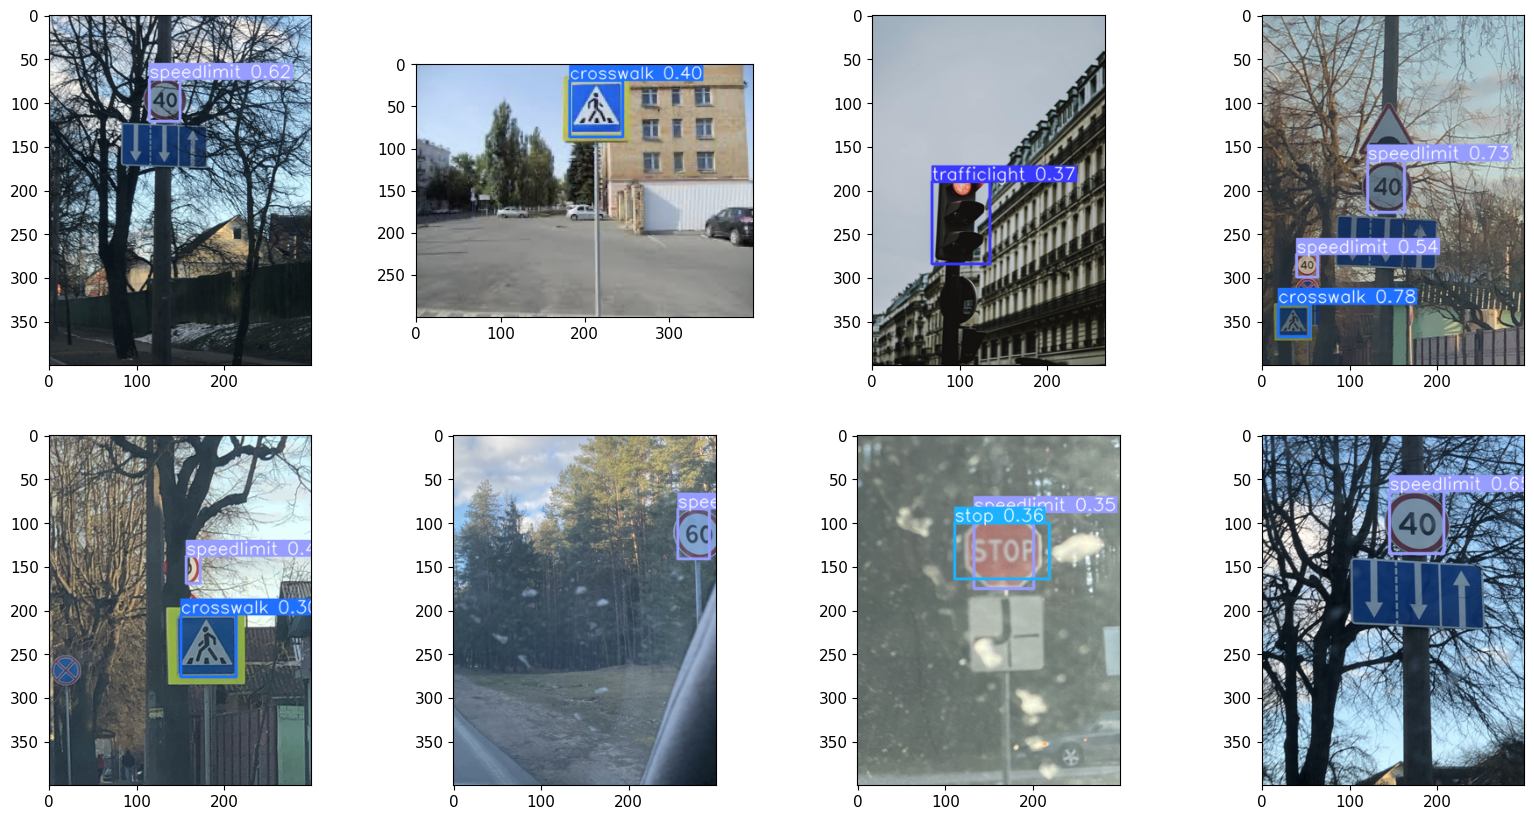

In [35]:
%matplotlib inline
fig, ax = plt.subplots(2,4, figsize = (20,10))
imgnames = os.listdir('./data/images/')

for x in itertools.product(range(2), range(4)):
    imgname = np.random.choice(imgnames)
    img = cv2.imread(f'./data/images/{imgname}')
    result = model(img)
    ax[x[0],x[1]].imshow(cv2.cvtColor(np.squeeze(result.render()), cv2.COLOR_BGR2RGB))